In [21]:
#Step 1 - Importing TF, Keras, Numpy and Matplotlib

from __future__ import print_function

# TensorFlow and tf.keras
import keras
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.layers import Dense, Dropout


# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import matplotlib.pyplot as plt

print(tf.__version__)
print(keras.__version__)

1.13.1
2.2.4-tf


In [0]:
# Step - 2: Accessing the dataset from Keras
# Alternatively use "from keras.datasets import fashion_mnist"
# Dataset is downloaded from Keras git repo "https://github.com/keras-team/keras/tree/master/keras/datasets"
# Dataset is already split into Train and Test

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

<function matplotlib.pyplot.show>

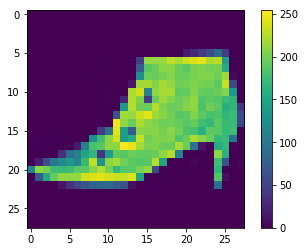

In [23]:
#Displays the images from 'test_images'

plt.figure()
plt.imshow(test_images[132])
plt.colorbar()
plt.grid(False)
plt.show

In [0]:
# Naming Class labels for 0 to 9

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
#Building model

model = keras.models.Sequential([
    keras.layers.Conv2D(32, (5, 5), padding="same", input_shape=[28, 28, 1]),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, (5, 5), padding="same"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [26]:
train_images.shape

(60000, 28, 28)

In [0]:
#Reshaping 'train_images' and 'test_images' to a 4D images to pass into Conv2D CNN algorithm

train_images = train_images.reshape([-1,28,28,1])
test_images = test_images.reshape([-1,28,28,1])

# To normalise, divide the image by 255
# Refer "https://stackoverflow.com/questions/695084/how-do-i-normalize-an-image"

train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
#from keras.utils import np_utils
#Converting labels to 'One Hot Encoding' to pass it to CNN model
#Read about One Hot Encoding here - https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
#print(train_labels)
#print(test_labels)

In [29]:
#Compile the model and fit the process train_images and test_images on the model

model.compile(keras.optimizers.Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, validation_split=0.10, batch_size=128, epochs=5, verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
 - 4s - loss: 0.6666 - acc: 0.7745 - val_loss: 0.4513 - val_acc: 0.8368
Epoch 2/5
 - 3s - loss: 0.4216 - acc: 0.8515 - val_loss: 0.3851 - val_acc: 0.8635
Epoch 3/5
 - 3s - loss: 0.3693 - acc: 0.8701 - val_loss: 0.3512 - val_acc: 0.8742
Epoch 4/5
 - 3s - loss: 0.3402 - acc: 0.8795 - val_loss: 0.3191 - val_acc: 0.8860
Epoch 5/5
 - 3s - loss: 0.3159 - acc: 0.8867 - val_loss: 0.3036 - val_acc: 0.8907


In [32]:
#Predicting the images from the 'test_images' using 'predict' method
#More the probablity of the image in the list, closer the chances of the image being true

predictions = model.predict(test_images)
predictions[400]

array([9.9326777e-01, 6.4661083e-07, 3.3545122e-05, 1.8936399e-04,
       1.2869765e-07, 1.2668762e-07, 6.5076253e-03, 5.5215161e-09,
       8.5676476e-07, 9.8464712e-09], dtype=float32)

In [37]:
print(test_labels[400])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
